In [1]:
import numpy as np
import queue
import copy
import matplotlib.pyplot as plt
from itertools import combinations

from scipy.special import binom
from math import factorial


In [2]:
m = 3  # kanały równoległę - lądowanie przeglad itd w jedno
#
# pasy przeznaczone do startu
# pasy przeznaczone do lądowania
# stanowiska przeglądu
# stanowiska tankowania
# stanowiska serwisu



In [28]:
# ile samolotow na godz
lambdas = []
lambd = 2
# intensywność
mi_ = [2, 4, 6]
ro_ = [lambd / mi for mi in mi_]



In [29]:
def calculate_SK(k, ro_list):
    sum_sk = 0

    # k elementowe kobinacje bez powtorzen indeksow
    comb = combinations(range(len(ro_list)), k)

    # iloczyn
    for pair in list(comb):
        prod = 1
        for elem_index in pair:
            prod = prod * ro_list[elem_index]
        # dodaj iloczyn do sumy
        sum_sk += prod

    return sum_sk

    # prob_0 = ???

In [46]:
def probability_k_in_sys(k, ro_list):
    m = len(ro_list)
    if k == 0:
        if calculate_SK(m, ro_list)/calculate_SK(m - 1, ro_list) < 1:
            val_to_sum = [calculate_SK(k, ro_list) / (factorial(k) * binom(m, k)) for k in range(m - 1)]
            sum_ = sum(val_to_sum)
            fraction = calculate_SK(m, ro_list) * calculate_SK(m - 1, ro_list) / (
                    factorial(m) * (calculate_SK(m - 1, ro_list) - calculate_SK(m, ro_list)))
            prob_k = 1 / (1 + sum_ + fraction)
        else:
            raise ValueError(" SK m m > SK (m-1) m")
    elif k > 0 and k < m:
        prob_k = probability_k_in_sys(0, ro_list) * calculate_SK(k, ro_list) / (factorial(k) * binom(m, k) ** (k - m))
    else:
        prob_k = probability_k_in_sys(0, ro_list) * calculate_SK(k, ro_list) / (
                factorial(k) * calculate_SK(m - 1, ro_list) ** (k - m))
    return prob_k

In [6]:
def calculate_K(ro_list):
    # Średnia liczba zgłoszeń w systemie:
    m = len(ro_list)
    tmp_numerator = probability_k_in_sys(0, ro_list) * calculate_SK(m - 1, ro_list)
    tmp_denominator = factorial(m) * (calculate_SK(m - 1, ro_list) / calculate_SK(m, ro_list) - 1) ** 2

    tmp_numerator_2 = m * probability_k_in_sys(m, ro_list)
    tmp_denominator_2 = calculate_SK(m - 1, ro_list)

    K = tmp_numerator / tmp_denominator + tmp_numerator_2 / tmp_denominator_2

    return K

In [36]:
def calculate_T(ro_list,lambd):
    # Średni czas przebywania zgłoszenia w systemie:
    K = calculate_K(ro_list)
    T = K/lambd

    return T

In [40]:
def calculate_m0(ro_list,lambd):
    # Średni liczba zajętych kanałów obsługi:
    m = len(ro_list)
    m0 = m*lambd/ sum(mi_)

    return m0

In [47]:
prob = probability_k_in_sys(0, ro_)

K = calculate_K(ro_)
T = calculate_T(ro_, lambd)
m0 = calculate_m0(ro_, lambd)
print(prob)
print(m0,K,T)


0.37815126050420167
0.5 0.034033613445378155 0.017016806722689078


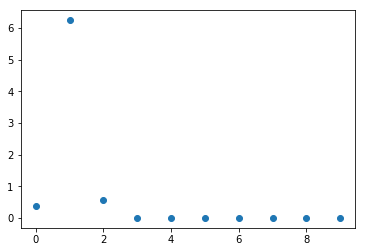

In [48]:
k_prob_list = [probability_k_in_sys(k, ro_) for k in range(10)]
plt.plot(range(10), k_prob_list, 'o')